In [ ]:
선동언 선생님꺼는 꼭 들을 것 -> 영상처리

오전
머신러닝을 기반으로 한 텍스트 마이닝 계속 할 것.
우리가 생성모델이라고 일반적으로 부르는 것 GM -> 확률분포에 대해서 알아야 함. 확률분포 가정해서 찾아갈거냐, 기계학습으로 만들어낼거냐
에 따라서 모델이 분기가 됨
GM(확률이 어떻게 전이되는지를 가지고 만듦) - DGM(deep generative model) - VAE(variational autoencoder), GAN

Bayes - bayesian Network - Graphical model - GM - DGM - VAE, GAN
                         -> PDF -> PDF(확률분포) => 간단한 수식으로 만드는게 어려움(필요한 파라미터 찾고 간단한 수식으로 표현하는 것이)
                         -> Sampling(내가 관측한 데이터는 이 확률분포로부터 나왔을 거라고 예상) - positive/negative
    메트로폴리스 헤이스트 -> MCMC(마르코프 체인 몬테카를로 체인) -> Gibbs (데이터를 가지고 확률분포를 추정하는 방법들. 그렇게 모델을 만듦)
    이것들을 탈피하기 위해서 DGM 이 나옴.
    
    사람이 머리를 쓰면서 하지 말고 NN가 필요한 파라미터를 찾아가게끔 학습시켜보자! 그게 VAE, GAN
    층을 여러개 쌓아서 NN 형태로 만든 것.
    
Bayes 를 이용한 것은 MAP(사후확률 최대, maximum posterior) 중에서 prior knowledge 를 활용하는 방법(우리가 배운 것은)

Classification
1. NB(나이브베이즈- 언어에서 특히 잘 돌아감. BoW 를 기반으로 모두가 독립이라고 가정하고 그걸 기반해서 모델이 만들어짐
  이걸로 만든 대표적인 것이 Spam 인지 아닌지. 실제 메일 데이터로 하면 좋을 것. 학습이 안된 메일데이터를 주면 evaluation 할 수 있음)
2. Regression(linear, polynomial, logistic, softmax) - 이걸 알아야 NN을 들어감

Clustering
3. K-means
4. GMM(음성쪽에서 많이 씀. gausian mixture model. 가우시안 혼합 모델) - 이건 안할 것
5. LDA(graphical model 중 하나)
6. matrix decomposition(언어와 관련해서)

7. NN(Numpy 로 이 모든 것들을 직접 만들 것.) - 여기부터는 코드 안만들고 직접 짜게 만들 것.
  -> Loss func 알아야 함. NN 구조. SLP, MLP, Activate func(sigmoid-Logistic, tanh, Softmax, MSE(배치사이즈 들어감, 확률x)
                                                    ,Entropy, CE(cross entropy), NLL, withLoss)
    ReLU 는 기울기가 constant. 이런 점들에 대해서 수식적으로 볼 것

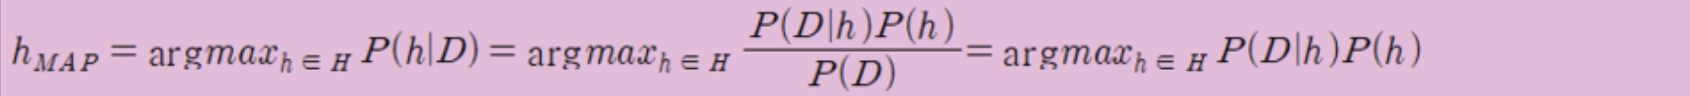

In [ ]:
머신러닝에 대한 전반적인 기초를 오전에 할 것. 실제 기본기부터 탄탄하게 할 만한 수업들이 많이 없기 때문에.
요즘 뜨는 분야가 공장 자동화(오캄의 면도날을 철저히 따름)

### Naive Bayes

In [ ]:
머신러닝을 가지고 classification 을 하겠다는 것.
이것을 배우기 전에 알아야 하는 것은 확률에 대해 이야기를 했으니 rule base 도 알고 있어야 함.
rule base 로 준수한 성능을 내는 decision tree 를 알게 되면 branch 를 만드는 개념인 entropy를 알 수 있음.
decision tree 를 여러개 묶어놓은 앙상블인 random forest 도 decision tree

나이브 베이즈는 베이즈 이론을 기반으로 함.
N-gram 할 때 여러개의 시퀀스에 계산을 실질적으로 못함을 알고 있음. 나이브 베이즈도 베이즈라서 동일한 문제를 가짐. 나이브 베이즈는 계산하기 쉽게
가지치기 한다는 것. 즉 naive assumption 으로 베이즈 수식을 간단히 할 것.

In [ ]:
지도 학습(supervised learning)을 하기 위해서 우리에게 반드시 필요한 것은, 우리가 예측해야 하는 타겟값 y에 해당하는 것이 반드시 있어야 함.
벡터로 구성될만한 x들이 있고, 마지막에 y가 있을 것 -> 즉 항상 true value 가 필요하고, 이 true value 를 설명하는 데이터가 필요함.

계산 가능한 rule 을 만들면서 머신러닝 만들 수 있음.
선을 decision boundary -> 이걸 넘어가는 순간 class 가 바뀜. decision boundary가 바뀌는 것에 따라 모델들이 생김
이 결정 경계면을 시그모이드 계열의 함수를 이용해서 만들어 낼 수도 있음 (0~1 확률값)
데이터가 어떤 확률분포를 그릴 것이다 가정하고 그 가정 분포를 최대한 만족하는 파라미터를 찾음
ex. 가우시안 분포를 따른다고 하면 평균과 분산 파라미터를 찾아야 함. 오늘 할 것은 베이즈 이론을 이용한 나이브 베이즈
그래서 데이터 가지고 확률값 만듦. 베이즈 모델에 보자!

참고로 kNN은 결정경계면이 없음.

위에서 중요한 것은 반드시 타겟값, true value, 클래스가 있어야 한다는 것

In [ ]:
discrete/continuous + supervised/unsupervised => 4가지 나눔
classification, clustering
regression, reduction of dimensionality

regression 은 추세를 예측하기 위함인데, 그걸 가지고 결정경계면을 만들어서 분류를 하게 됨.
따라서 regression 은 반드시 알아야 함.

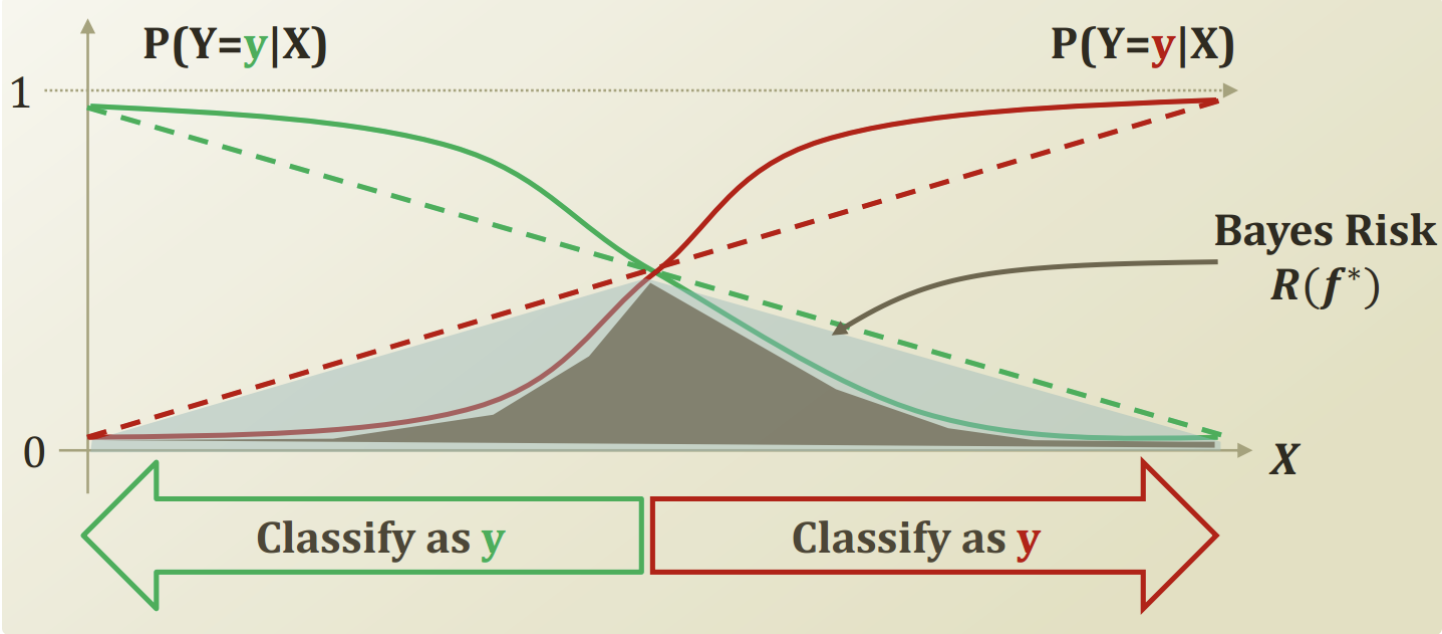

In [ ]:
수많은 형태의 classification 모델을 만들 수 있음.
그 중에서도 어떤 classifier 를 만들어야 하느냐?
우리가 MLE 를 가지고 추정할 때, 우리의 가설을 가장 maximize 할 수 있는 likelihood 를 찾는 것이 최대 우도 추정법
우리가 만드는 classifier 는 엄청 많음. 미래의 데이터를 감안해서 최대한 robust 하면서 잘 분류할 수 있는 classifier 를 찾는게 우리의 목적
즉 optimal 한 classifier 를 찾는 것. 이에 따라 모델이 나뉨.

f* 는 error 가 가장 줄어든 형태를 가지고 optimal 한 classifier 라고 부를 것.
데이터가 given 일 때 likelihood 를 가지고 y를 에측했을 때, 이게 진짜 true y 일 확률을 최대로 한 것과 같은 말임(관점만 다름)

In [ ]:
bayes assumption
MLE / MAP

베이즈 이론의 강점이 사전/사후 관계를 뒤바꿀 수 있다는 것. -> 전후관계 바꾸는 것은 결합확률과 조건부확률간의 관계만 이용하면 됨.
prior(사전), likelihood(우도), posterior(사후)

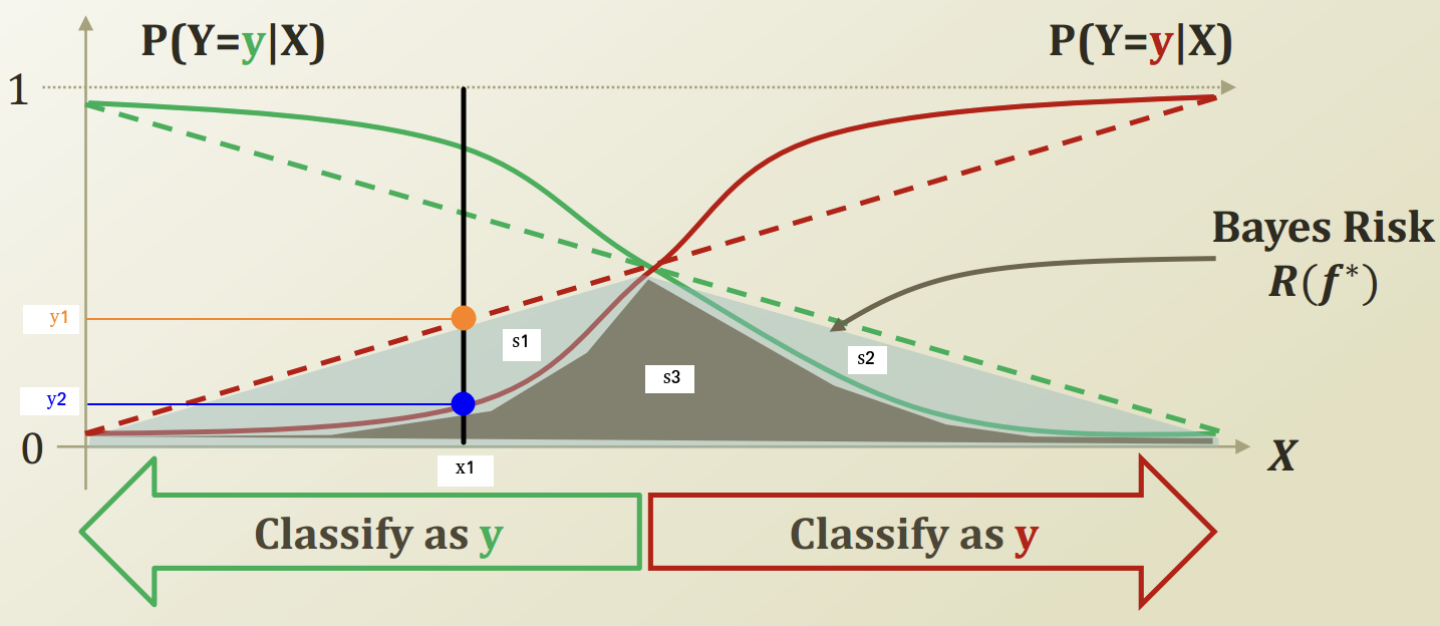

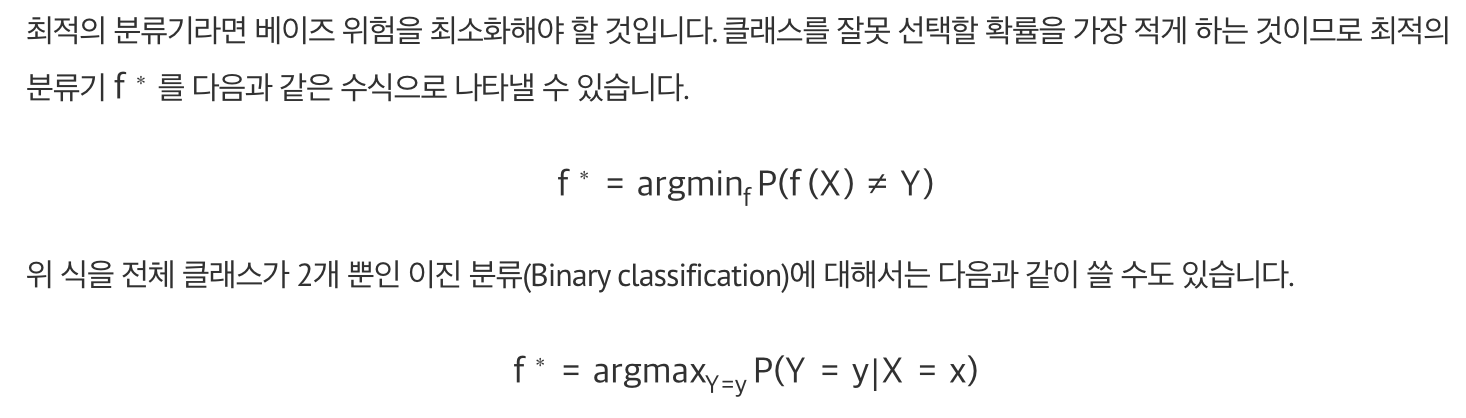

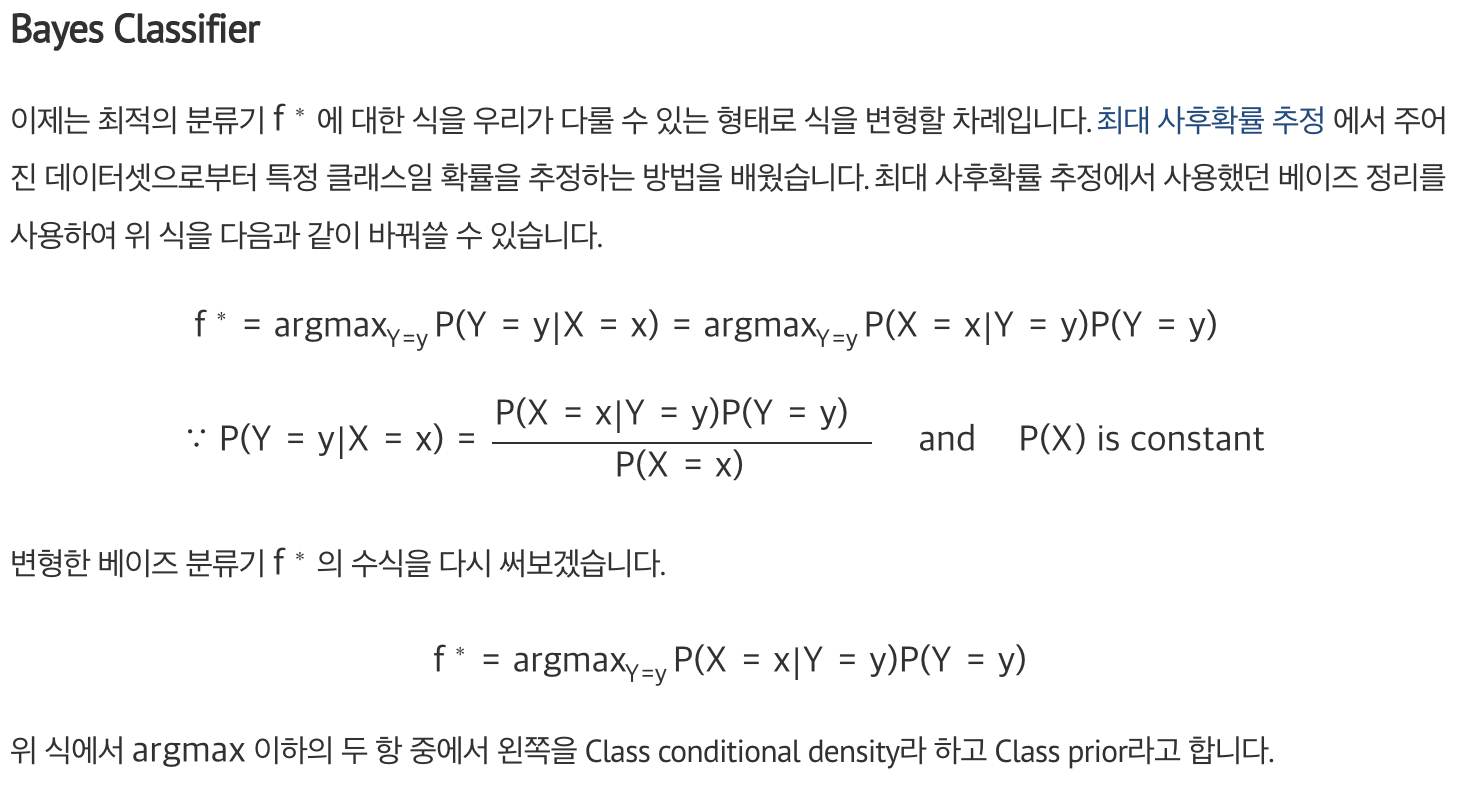

In [ ]:
Bayes Risk

이걸 줄이는 형태로!
x가 주어졌을 떄 y를 예측할 건데, 최대한 bayes risk 를 줄이도록
1) 예측을 잘하던가
2) bayes risk 를 줄이던가 가능

In [ ]:
prior knowlegde P(Y=y)
likelihood P(X=x|Y=y)

In [ ]:
classifier 를 여러개 만드는데 optimal classifier 를 찾아야 함.
에러를 줄이든지
우리 모델이 true y를 잘 예측하든지
bayes risk 를 줄이는 형태 - 반대 케이스의 에러를 줄이는 형태 - 즉 우리 모델이 true y를 잘 예측하도록

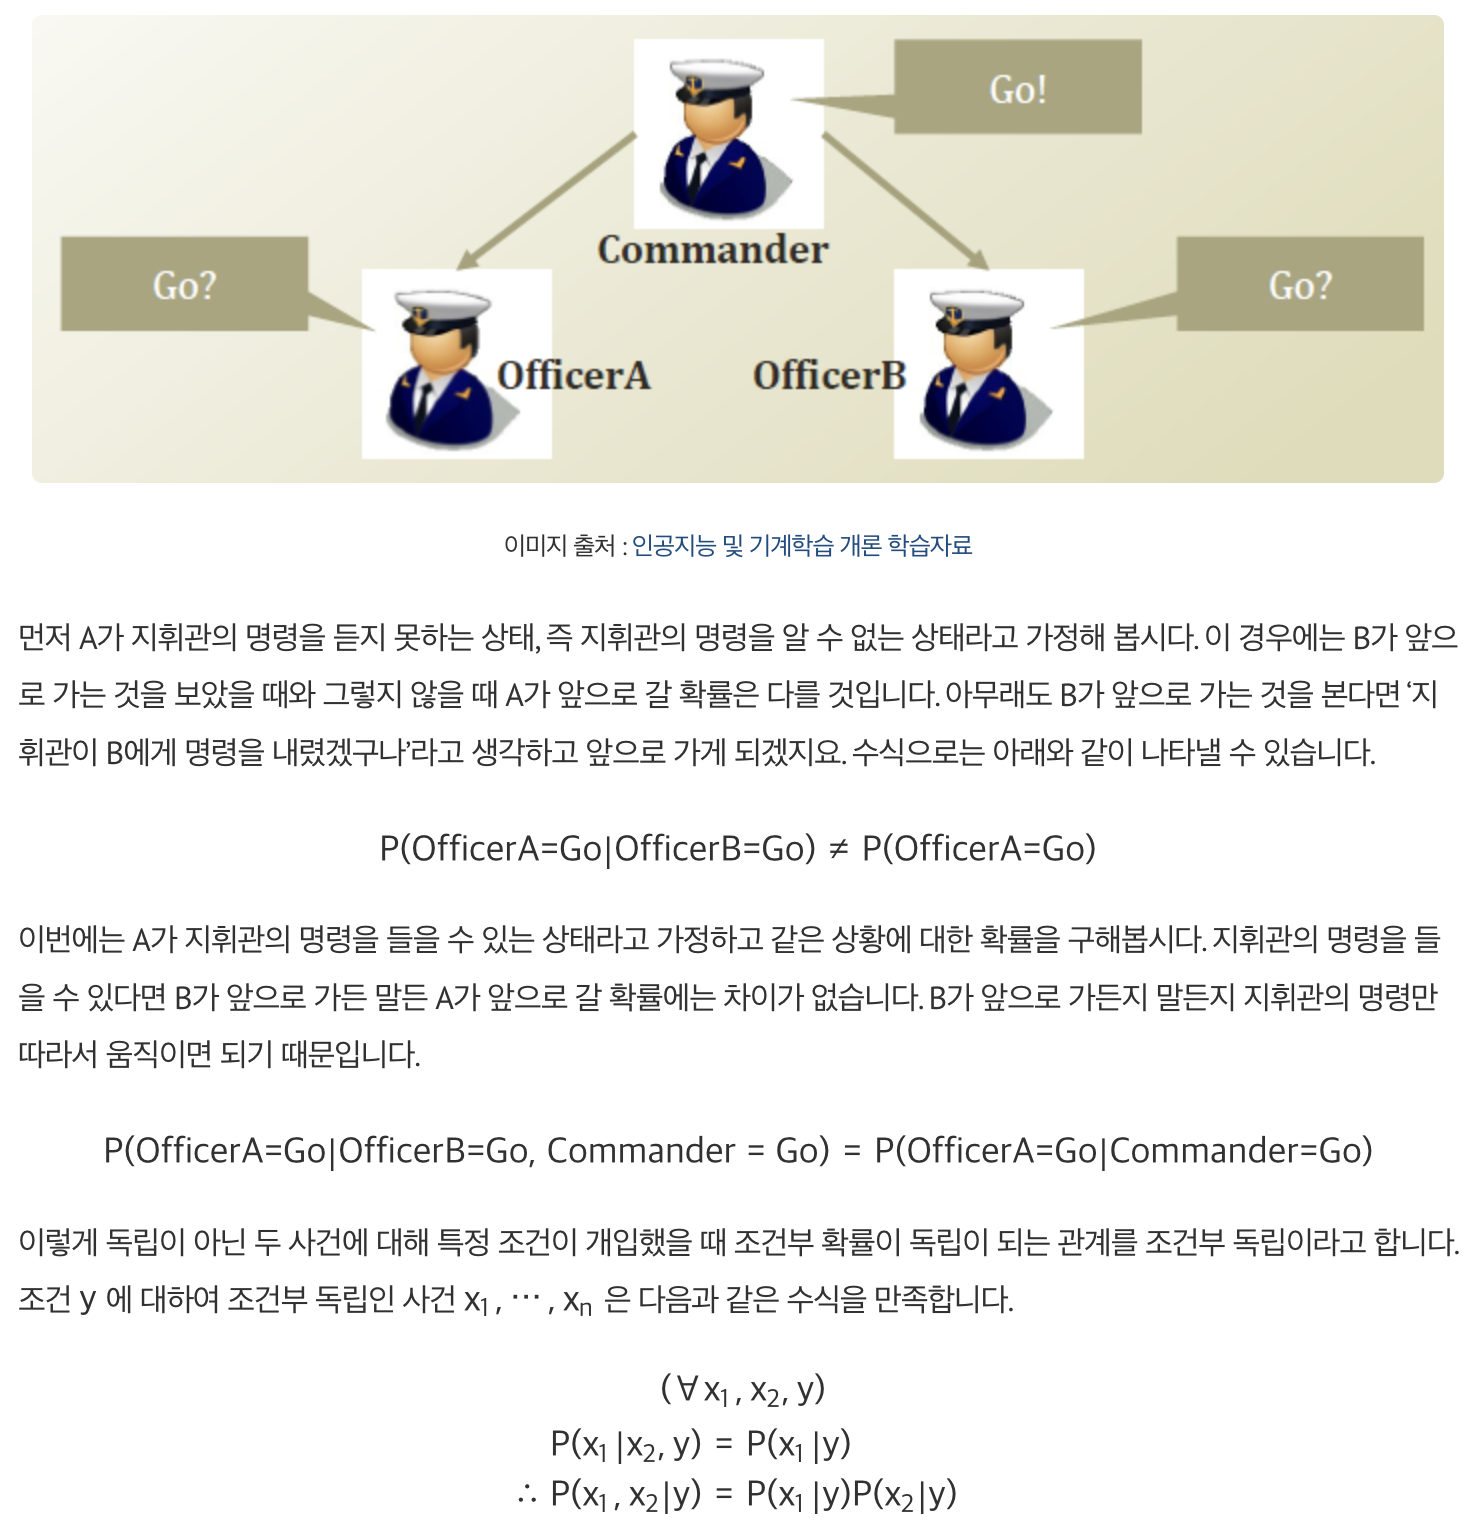

In [2]:
하지만 현실세계에서는 특성들이 서로 조건부독립을 만족하지 않는 경우가 대부분.
파라미터의 개수를 줄이기 위한 가정이 말 그대로 너무 순진한(Naive, 나이브) 한 가정이기 때문에 이 가정을 사용한 베이즈 분류기를
나이브 베이즈 분류기(Naive Bayes Classifier) 라고 부름.
나이브 베이즈 분류기는 비록 특수한 가정을 사용하였지만 몇몇 태스크에서 다른 복잡한 모델보다도 더 좋은 성능을 내기도 함

In [ ]:
naive assumption 은 내일 할 것